In [1]:
# Using Convolutional Neural Networks
# Convolutions extract features by applying filters to the input

import tensorflow_datasets as tfds

# Download the subword encoded pretokenized dataset
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)

# Get the tokenizer
tokenizer = info.features['text'].encoder

In [2]:
BUFFER_SIZE = 10000
BATCH_SIZE = 256

# Get the train and test splits
train_data, test_data = dataset['train'], dataset['test'],

# Shuffle the training data
train_dataset = train_data.shuffle(BUFFER_SIZE)

# Batch and pad the datasets to the max length of the sequence
train_dataset = train_dataset.padded_batch(BATCH_SIZE)
test_dataset = test_data.padded_batch(BATCH_SIZE)

In [3]:
# Conv1 and pooling to reduce output of the convolution layer
# GlobalMaxPooling1D to get the max value across the time dimension

import tensorflow as tf
import numpy as np

# Hyperparameters
batch_size = 1
timesteps = 20 # sequence lenght
features = 20 # embedding size
filters = 128
kernel_size = 5

# Define array input with random values
random_input = np.random.rand(batch_size, timesteps, features)
print(f"Input array shape: {random_input.shape}")

# Pass array to convolution layer and inspect output shape
conv1d = tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu')
result = conv1d(random_input)
print(f"Conv1D output shape: {result.shape}")

# Pass array to max pooling layer
gmp = tf.keras.layers.GlobalMaxPooling1D()
result = gmp(result)
print(f"gmp output shape: {result.shape}")

Input array shape: (1, 20, 20)
Conv1D output shape: (1, 16, 128)
gmp output shape: (1, 128)


In [5]:
# Build model by appending the convolution and pooling layer after the embedding layer

import tensorflow as tf

# Hyperparameters
embedding_dim = 64
filters = 128
kernel_size = 5
dense_dim = 64

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [6]:
# Compile
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [7]:
NUM_EPOCHS = 10

# Train model
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset, verbose=2)

Epoch 1/10
98/98 [==============================] - ETA: 3:01 - loss: 0.6938 - accuracy: 0.45 - ETA: 1:44 - loss: 0.6933 - accuracy: 0.48 - ETA: 1:36 - loss: 0.6933 - accuracy: 0.47 - ETA: 1:37 - loss: 0.6932 - accuracy: 0.47 - ETA: 1:37 - loss: 0.6932 - accuracy: 0.49 - ETA: 1:48 - loss: 0.6931 - accuracy: 0.48 - ETA: 2:15 - loss: 0.6932 - accuracy: 0.49 - ETA: 2:22 - loss: 0.6931 - accuracy: 0.50 - ETA: 2:26 - loss: 0.6929 - accuracy: 0.50 - ETA: 2:26 - loss: 0.6928 - accuracy: 0.50 - ETA: 2:23 - loss: 0.6927 - accuracy: 0.50 - ETA: 2:23 - loss: 0.6927 - accuracy: 0.50 - ETA: 2:25 - loss: 0.6930 - accuracy: 0.50 - ETA: 2:20 - loss: 0.6930 - accuracy: 0.50 - ETA: 2:18 - loss: 0.6931 - accuracy: 0.49 - ETA: 2:19 - loss: 0.6930 - accuracy: 0.49 - ETA: 2:19 - loss: 0.6928 - accuracy: 0.50 - ETA: 2:16 - loss: 0.6926 - accuracy: 0.51 - ETA: 2:13 - loss: 0.6925 - accuracy: 0.51 - ETA: 2:12 - loss: 0.6924 - accuracy: 0.51 - ETA: 2:10 - loss: 0.6923 - accuracy: 0.51 - ETA: 2:09 - loss: 0.6922

98/98 [==============================] - ETA: 2:28 - loss: 0.3495 - accuracy: 0.83 - ETA: 6:00 - loss: 0.3776 - accuracy: 0.83 - ETA: 4:17 - loss: 0.3873 - accuracy: 0.83 - ETA: 3:46 - loss: 0.3874 - accuracy: 0.83 - ETA: 3:24 - loss: 0.3836 - accuracy: 0.83 - ETA: 3:14 - loss: 0.3858 - accuracy: 0.83 - ETA: 3:05 - loss: 0.3818 - accuracy: 0.83 - ETA: 2:55 - loss: 0.3831 - accuracy: 0.83 - ETA: 2:55 - loss: 0.3798 - accuracy: 0.83 - ETA: 2:48 - loss: 0.3790 - accuracy: 0.83 - ETA: 2:43 - loss: 0.3777 - accuracy: 0.83 - ETA: 2:38 - loss: 0.3742 - accuracy: 0.83 - ETA: 2:33 - loss: 0.3753 - accuracy: 0.83 - ETA: 2:29 - loss: 0.3756 - accuracy: 0.83 - ETA: 2:25 - loss: 0.3746 - accuracy: 0.83 - ETA: 2:23 - loss: 0.3754 - accuracy: 0.83 - ETA: 2:22 - loss: 0.3696 - accuracy: 0.83 - ETA: 2:20 - loss: 0.3659 - accuracy: 0.83 - ETA: 2:17 - loss: 0.3634 - accuracy: 0.84 - ETA: 2:15 - loss: 0.3617 - accuracy: 0.84 - ETA: 2:12 - loss: 0.3578 - accuracy: 0.84 - ETA: 2:08 - loss: 0.3578 - accuracy

98/98 [==============================] - ETA: 2:42 - loss: 0.1774 - accuracy: 0.95 - ETA: 2:01 - loss: 0.1679 - accuracy: 0.95 - ETA: 2:19 - loss: 0.1792 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1751 - accuracy: 0.94 - ETA: 2:14 - loss: 0.1633 - accuracy: 0.95 - ETA: 2:15 - loss: 0.1623 - accuracy: 0.94 - ETA: 2:29 - loss: 0.1607 - accuracy: 0.95 - ETA: 2:23 - loss: 0.1638 - accuracy: 0.94 - ETA: 2:19 - loss: 0.1707 - accuracy: 0.94 - ETA: 2:20 - loss: 0.1724 - accuracy: 0.94 - ETA: 2:15 - loss: 0.1713 - accuracy: 0.94 - ETA: 2:12 - loss: 0.1706 - accuracy: 0.94 - ETA: 2:10 - loss: 0.1728 - accuracy: 0.94 - ETA: 2:07 - loss: 0.1737 - accuracy: 0.93 - ETA: 2:19 - loss: 0.1730 - accuracy: 0.93 - ETA: 2:17 - loss: 0.1708 - accuracy: 0.94 - ETA: 2:15 - loss: 0.1718 - accuracy: 0.93 - ETA: 2:12 - loss: 0.1728 - accuracy: 0.93 - ETA: 2:09 - loss: 0.1721 - accuracy: 0.93 - ETA: 2:10 - loss: 0.1695 - accuracy: 0.94 - ETA: 2:07 - loss: 0.1677 - accuracy: 0.94 - ETA: 2:05 - loss: 0.1674 - accuracy

98/98 [==============================] - ETA: 2:53 - loss: 0.0724 - accuracy: 0.98 - ETA: 2:22 - loss: 0.0719 - accuracy: 0.98 - ETA: 2:19 - loss: 0.0737 - accuracy: 0.98 - ETA: 2:27 - loss: 0.0768 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0801 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0792 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0784 - accuracy: 0.98 - ETA: 2:23 - loss: 0.0765 - accuracy: 0.98 - ETA: 2:23 - loss: 0.0775 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0770 - accuracy: 0.98 - ETA: 2:33 - loss: 0.0755 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0744 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0752 - accuracy: 0.98 - ETA: 2:38 - loss: 0.0746 - accuracy: 0.98 - ETA: 2:34 - loss: 0.0761 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0778 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0782 - accuracy: 0.98 - ETA: 2:30 - loss: 0.0793 - accuracy: 0.98 - ETA: 2:41 - loss: 0.0790 - accuracy: 0.98 - ETA: 2:39 - loss: 0.0781 - accuracy: 0.98 - ETA: 2:35 - loss: 0.0776 - accuracy: 0.98 - ETA: 2:31 - loss: 0.0777 - accuracy

98/98 [==============================] - ETA: 3:09 - loss: 0.0239 - accuracy: 0.99 - ETA: 2:44 - loss: 0.0240 - accuracy: 0.99 - ETA: 2:58 - loss: 0.0227 - accuracy: 0.99 - ETA: 2:59 - loss: 0.0219 - accuracy: 0.99 - ETA: 2:49 - loss: 0.0234 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0235 - accuracy: 0.99 - ETA: 2:54 - loss: 0.0230 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0225 - accuracy: 0.99 - ETA: 2:45 - loss: 0.0228 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0228 - accuracy: 0.99 - ETA: 2:42 - loss: 0.0226 - accuracy: 0.99 - ETA: 2:38 - loss: 0.0222 - accuracy: 0.99 - ETA: 2:32 - loss: 0.0219 - accuracy: 0.99 - ETA: 2:28 - loss: 0.0221 - accuracy: 0.99 - ETA: 2:23 - loss: 0.0224 - accuracy: 0.99 - ETA: 2:20 - loss: 0.0226 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0225 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0225 - accuracy: 0.99 - ETA: 2:09 - loss: 0.0225 - accuracy: 0.99 - ETA: 2:06 - loss: 0.0228 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0238 - accuracy: 0.99 - ETA: 2:01 - loss: 0.0236 - accuracy

98/98 [==============================] - ETA: 5:59 - loss: 0.0068 - accuracy: 1.00 - ETA: 2:31 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:20 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:24 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:12 - loss: 0.0078 - accuracy: 1.00 - ETA: 2:18 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:16 - loss: 0.0081 - accuracy: 1.00 - ETA: 2:17 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0078 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0078 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0078 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:11 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:09 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:08 - loss: 0.0080 - accuracy: 1.00 - ETA: 2:05 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:03 - loss: 0.0079 - accuracy: 1.00 - ETA: 2:01 - loss: 0.0078 - accuracy: 1.00 - ETA: 2:01 - loss: 0.0079 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0078 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0078 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0077 - accuracy

98/98 [==============================] - ETA: 2:59 - loss: 0.0044 - accuracy: 1.00 - ETA: 3:22 - loss: 0.0037 - accuracy: 1.00 - ETA: 3:31 - loss: 0.0036 - accuracy: 1.00 - ETA: 3:17 - loss: 0.0034 - accuracy: 1.00 - ETA: 3:11 - loss: 0.0103 - accuracy: 0.99 - ETA: 3:06 - loss: 0.0092 - accuracy: 0.99 - ETA: 2:55 - loss: 0.0083 - accuracy: 0.99 - ETA: 2:48 - loss: 0.0078 - accuracy: 0.99 - ETA: 2:40 - loss: 0.0072 - accuracy: 0.99 - ETA: 2:36 - loss: 0.0069 - accuracy: 0.99 - ETA: 2:35 - loss: 0.0065 - accuracy: 0.99 - ETA: 2:30 - loss: 0.0062 - accuracy: 0.99 - ETA: 2:26 - loss: 0.0060 - accuracy: 0.99 - ETA: 2:22 - loss: 0.0058 - accuracy: 0.99 - ETA: 2:19 - loss: 0.0056 - accuracy: 0.99 - ETA: 2:17 - loss: 0.0054 - accuracy: 0.99 - ETA: 2:15 - loss: 0.0053 - accuracy: 0.99 - ETA: 2:13 - loss: 0.0051 - accuracy: 0.99 - ETA: 2:10 - loss: 0.0050 - accuracy: 0.99 - ETA: 2:08 - loss: 0.0049 - accuracy: 0.99 - ETA: 2:05 - loss: 0.0049 - accuracy: 0.99 - ETA: 2:03 - loss: 0.0048 - accuracy

98/98 [==============================] - ETA: 1:50 - loss: 0.0020 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0021 - accuracy: 1.00 - ETA: 2:00 - loss: 0.0022 - accuracy: 1.00 - ETA: 2:03 - loss: 0.0022 - accuracy: 1.00 - ETA: 2:01 - loss: 0.0021 - accuracy: 1.00 - ETA: 2:02 - loss: 0.0021 - accuracy: 1.00 - ETA: 2:00 - loss: 0.0020 - accuracy: 1.00 - ETA: 1:58 - loss: 0.0020 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0021 - accuracy: 1.00 - ETA: 2:00 - loss: 0.0021 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0021 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0042 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0041 - accuracy: 0.99 - ETA: 1:59 - loss: 0.0040 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0039 - accuracy: 0.99 - ETA: 1:57 - loss: 0.0038 - accuracy: 0.99 - ETA: 1:56 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:55 - loss: 0.0036 - accuracy: 0.99 - ETA: 1:52 - loss: 0.0035 - accuracy: 0.99 - ETA: 1:51 - loss: 0.0034 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0033 - accuracy: 0.99 - ETA: 1:49 - loss: 0.0033 - accuracy

98/98 [==============================] - ETA: 2:18 - loss: 0.0016 - accuracy: 1.00 - ETA: 1:46 - loss: 0.0015 - accuracy: 1.00 - ETA: 2:13 - loss: 0.0015 - accuracy: 1.00 - ETA: 2:16 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:14 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:12 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:15 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:18 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:14 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:10 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:10 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:08 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:06 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:03 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:02 - loss: 0.0014 - accuracy: 1.00 - ETA: 2:01 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:59 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:57 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:56 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:55 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0014 - accuracy: 1.00 - ETA: 1:52 - loss: 0.0014 - accuracy

98/98 [==============================] - ETA: 2:23 - loss: 9.0202e-04 - accuracy: 1.00 - ETA: 1:47 - loss: 8.8480e-04 - accuracy: 1.00 - ETA: 1:42 - loss: 9.9017e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 0.0010 - accuracy: 1.0000   - ETA: 1:52 - loss: 9.8159e-04 - accuracy: 1.00 - ETA: 1:49 - loss: 9.5945e-04 - accuracy: 1.00 - ETA: 1:45 - loss: 9.6350e-04 - accuracy: 1.00 - ETA: 1:43 - loss: 9.5830e-04 - accuracy: 1.00 - ETA: 1:52 - loss: 9.5957e-04 - accuracy: 1.00 - ETA: 1:52 - loss: 9.5338e-04 - accuracy: 1.00 - ETA: 1:52 - loss: 9.7086e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 9.6075e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 9.5953e-04 - accuracy: 1.00 - ETA: 1:46 - loss: 9.4639e-04 - accuracy: 1.00 - ETA: 1:48 - loss: 9.4882e-04 - accuracy: 1.00 - ETA: 1:46 - loss: 9.3679e-04 - accuracy: 1.00 - ETA: 1:45 - loss: 9.3991e-04 - accuracy: 1.00 - ETA: 1:44 - loss: 9.5087e-04 - accuracy: 1.00 - ETA: 1:43 - loss: 9.4767e-04 - accuracy: 1.00 - ETA: 1:50 - loss: 9.5261e-04 - accuracy: 1.00 -

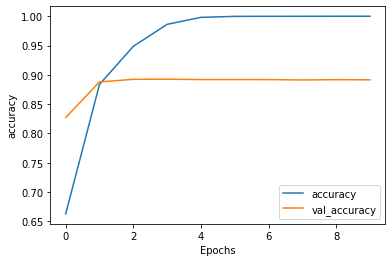

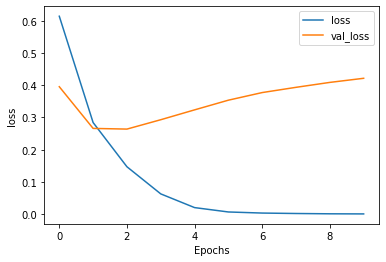

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot utility
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")